In [265]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

In [266]:
pd.set_option('display.max_row', 32)
pd.set_option('display.max_column', 32)

In [267]:
data = pd.read_csv("./dataset/data.csv")

In [268]:
data.head()

,ID,Diagnosis,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dim1,radius2,texture2,perimeter2,area2,smoothness2,compactness2,concavity2,concave_points2,symmetry2,fractal_dim2,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dim3
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [269]:
data.describe()

,ID,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dim1,radius2,texture2,perimeter2,area2,smoothness2,compactness2,concavity2,concave_points2,symmetry2,fractal_dim2,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dim3
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


# Data Analysis
## In general

- **target**: Diagnosis
- **Samples**: 569
- **Columns**: 32 - Three groups of features with same names 
- **Missing values**: very few
    - Presence of Missing values (as 0) in 6 columns: 'concavity1', 'concave_points2', 'concavity2', 'concave_points2' and 'concavity3', 'concave_points3'
    - All missing values concern only 13 samples, all Benign (~2.3%)

## In deep
- **target Analysis**:
    - B: 357 / M 212 --- 37% of Malignant
- **Variable distribution**:
    - Continuous, skewed, mesures on mass ?
- **Relations features / target**: 
    - fractal_dim1 texture2 smoothness2 concavity2 symmetry2 fractal_dim2 seems to not be very different between M and B diagnosis
    - Others features seem to be linked to diagnosis ==> hypothesis to test
- **Correlations features/features**:
    - some features are very correlated --> Watch-out for later
    - concave_points1 and concave_points2 seems to be high correlated to other var
    
    - radius is hi 
    - /!\ Compare with scatter plot, because Pearson correlation only means while there’s at least somewhat of a linear relationship

## Hypothesis H0
    - Some features have distribution significantly different between diagnosis --> Use of the "Student test"
        => All features except fractal_dim1, texture2, smoothness2, symmetry2 seems to have significant impact on the diagnosis

## Feature selection
- Variance Treshold not usable because of differences in features repartions

In [270]:
# Shape
df = data.copy()
df.shape

(569, 32)

In [271]:
# Data types in dataset
df.dtypes.value_counts()

float64    30
int64       1
object      1
dtype: int64

# Missing values
### (represented as 0)

In [272]:
# Nbr of rows with Missing values by row
mv = (df == 0)
smv = mv.sum()
smv[smv.values > 0]

concavity1         13
concave_points1    13
concavity2         13
concave_points2    13
concavity3         13
concave_points3    13
dtype: int64

<AxesSubplot:>

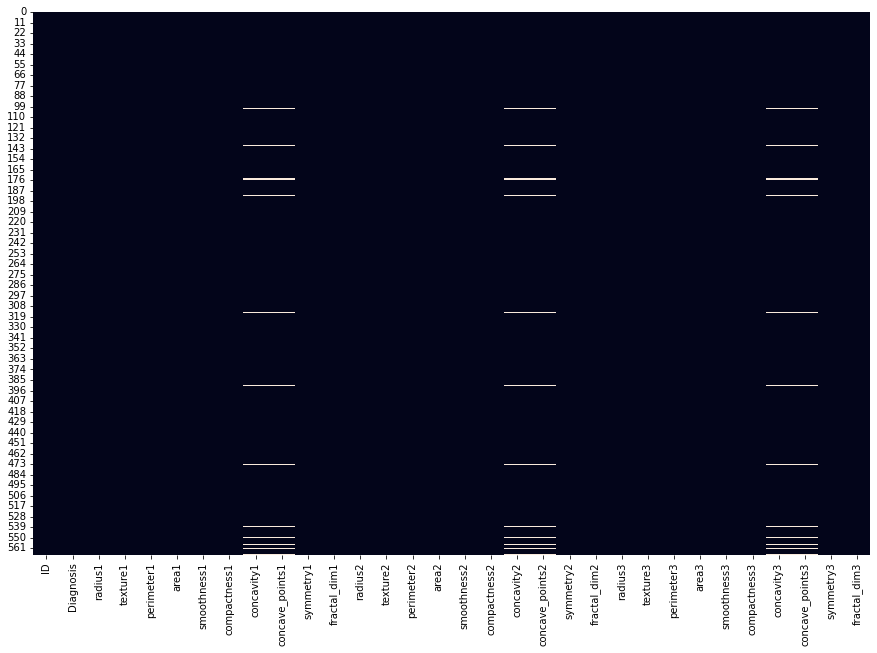

In [273]:
plt.figure(figsize=(15,10))
sns.heatmap(mv, cbar=False)

In [274]:
# Total number of rows with at least one missing data
mv.any(axis = 1).sum()

13

In [275]:
# % of rows with at least one missing data
mv.any(axis = 1).sum() / df.shape[0]

0.022847100175746926

In [276]:
# Check if Missing values are all in same rows
idx_with_missing_values = df['ID'][df['concavity1'] == 0].index
print(idx_with_missing_values)
print(df['ID'][df['concavity2'] == 0].index)
print(df['ID'][df['concavity3'] == 0].index)
print(df['ID'][df['concave_points1'] == 0].index)
print(df['ID'][df['concave_points2'] == 0].index)
print(df['ID'][df['concave_points3'] == 0].index)

Int64Index([101, 140, 174, 175, 192, 314, 391, 473, 538, 550, 557, 561, 568], dtype='int64')
Int64Index([101, 140, 174, 175, 192, 314, 391, 473, 538, 550, 557, 561, 568], dtype='int64')
Int64Index([101, 140, 174, 175, 192, 314, 391, 473, 538, 550, 557, 561, 568], dtype='int64')
Int64Index([101, 140, 174, 175, 192, 314, 391, 473, 538, 550, 557, 561, 568], dtype='int64')
Int64Index([101, 140, 174, 175, 192, 314, 391, 473, 538, 550, 557, 561, 568], dtype='int64')
Int64Index([101, 140, 174, 175, 192, 314, 391, 473, 538, 550, 557, 561, 568], dtype='int64')


In [277]:
df = df.drop('ID', axis=1)

## Target Analysis

In [278]:
df['Diagnosis'].value_counts(normalize=True)

B    0.627417
M    0.372583
Name: Diagnosis, dtype: float64

## Histograms - distribution | Relations features / target

In [279]:
def get_numeric_col_names(df):
    return df.select_dtypes(include=np.number).columns.tolist()

features = get_numeric_col_names(df)

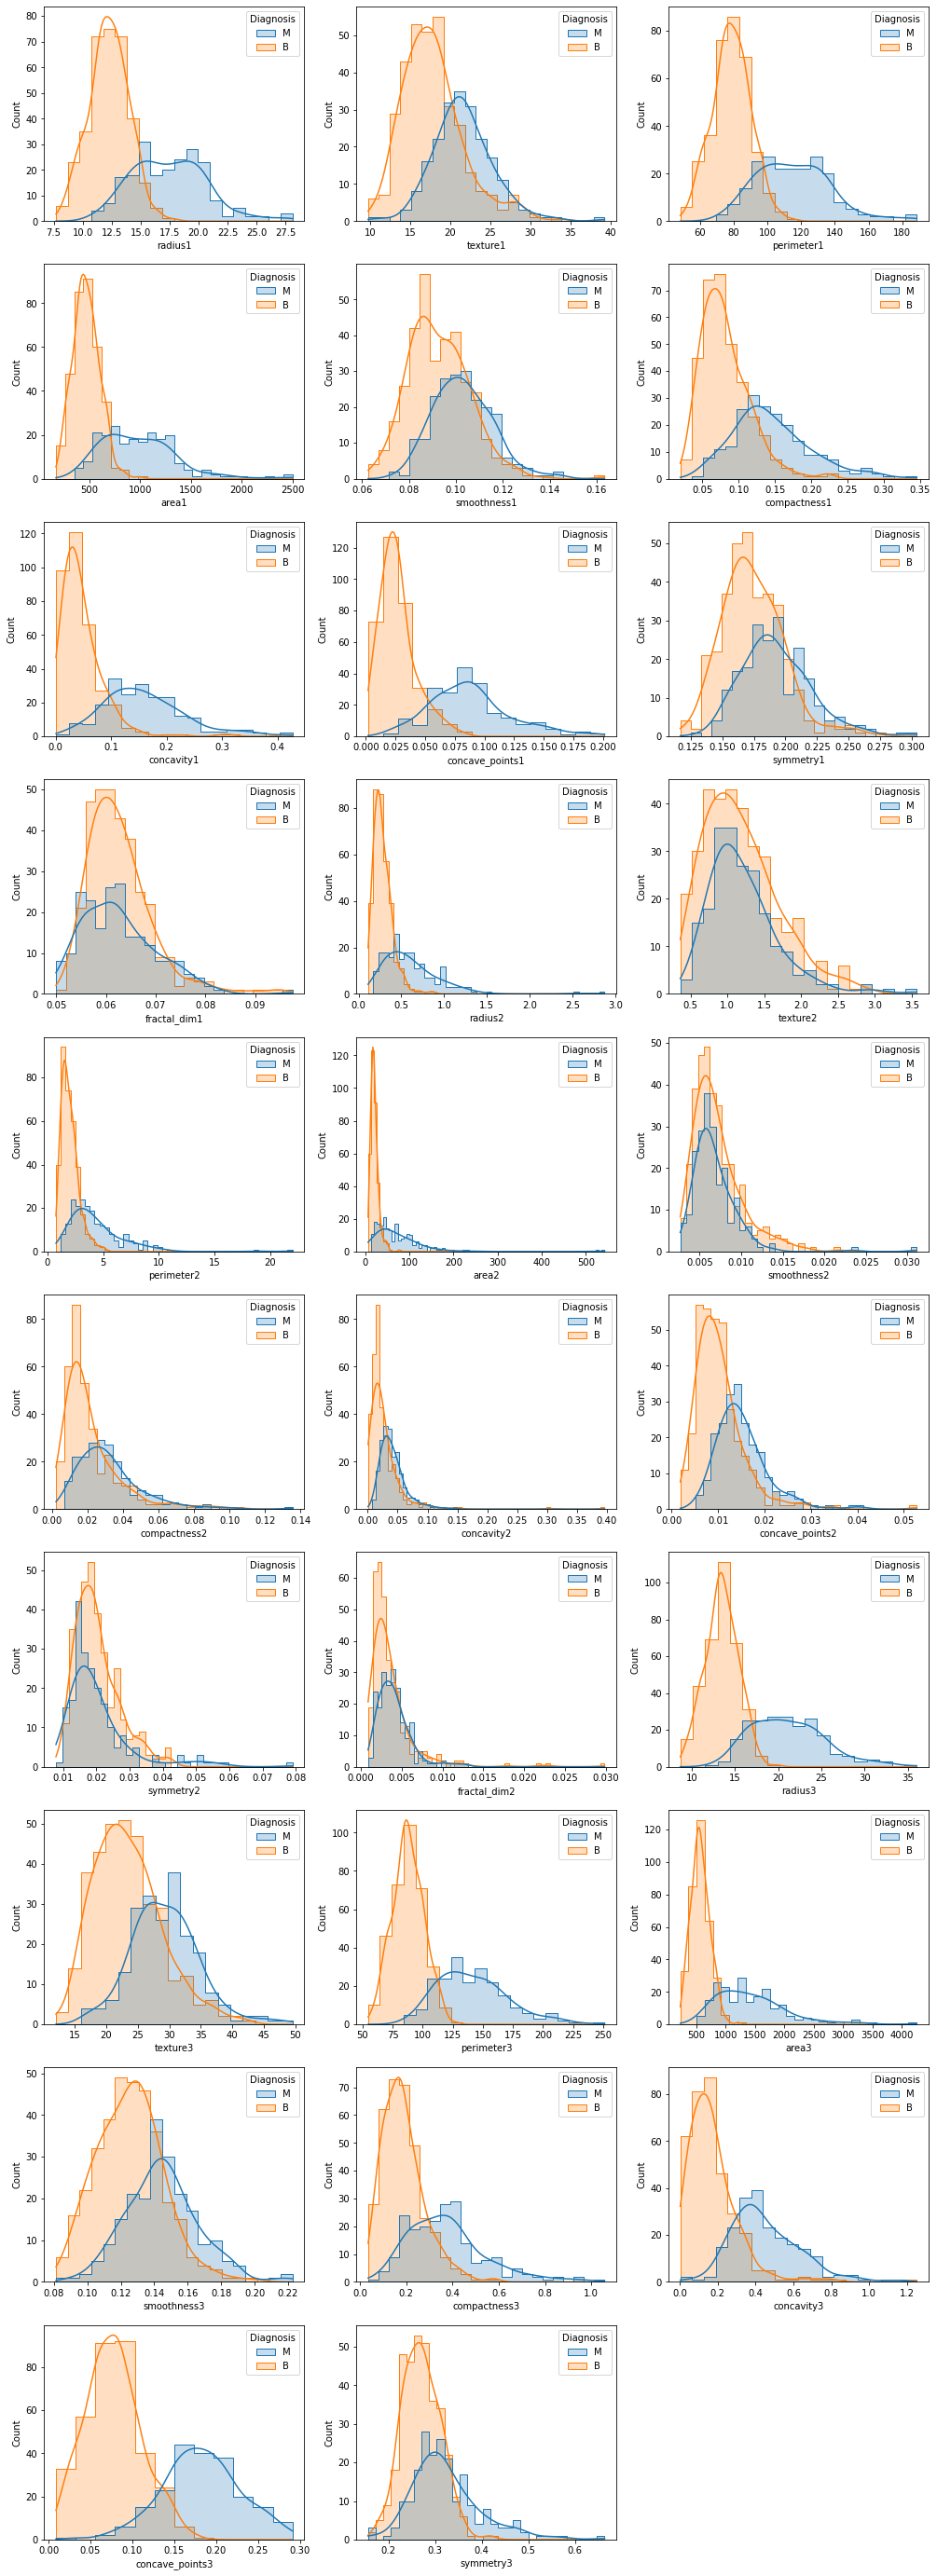

In [373]:
# plt.figure(figsize=(14, 50))
# for feature, i in zip(features, range(1, len(features))):
#     plt.subplot(10, 3, i)
#     df.groupby(['Diagnosis'])[feature].plot(kind='hist', alpha=.5)
#     plt.legend()
#     plt.title(feature)
#     plt.tight_layout()

plt.figure(figsize=(17, 50))
for feature, i in zip(features, range(1, len(features))):
    plt.subplot(10, 3, i)
    sns.histplot(data=df, x=df[feature], hue='Diagnosis', kde=True, element="step")

# Correlations between features
## Pairplot and Correlation matrix

In [281]:
# sns.set_theme()
# sns.pairplot(df, hue="Diagnosis", diag_kind='hist', plot_kws={'alpha': .5}, diag_kws={'alpha': .5}, corner=True)
# plt.savefig("pairplot")

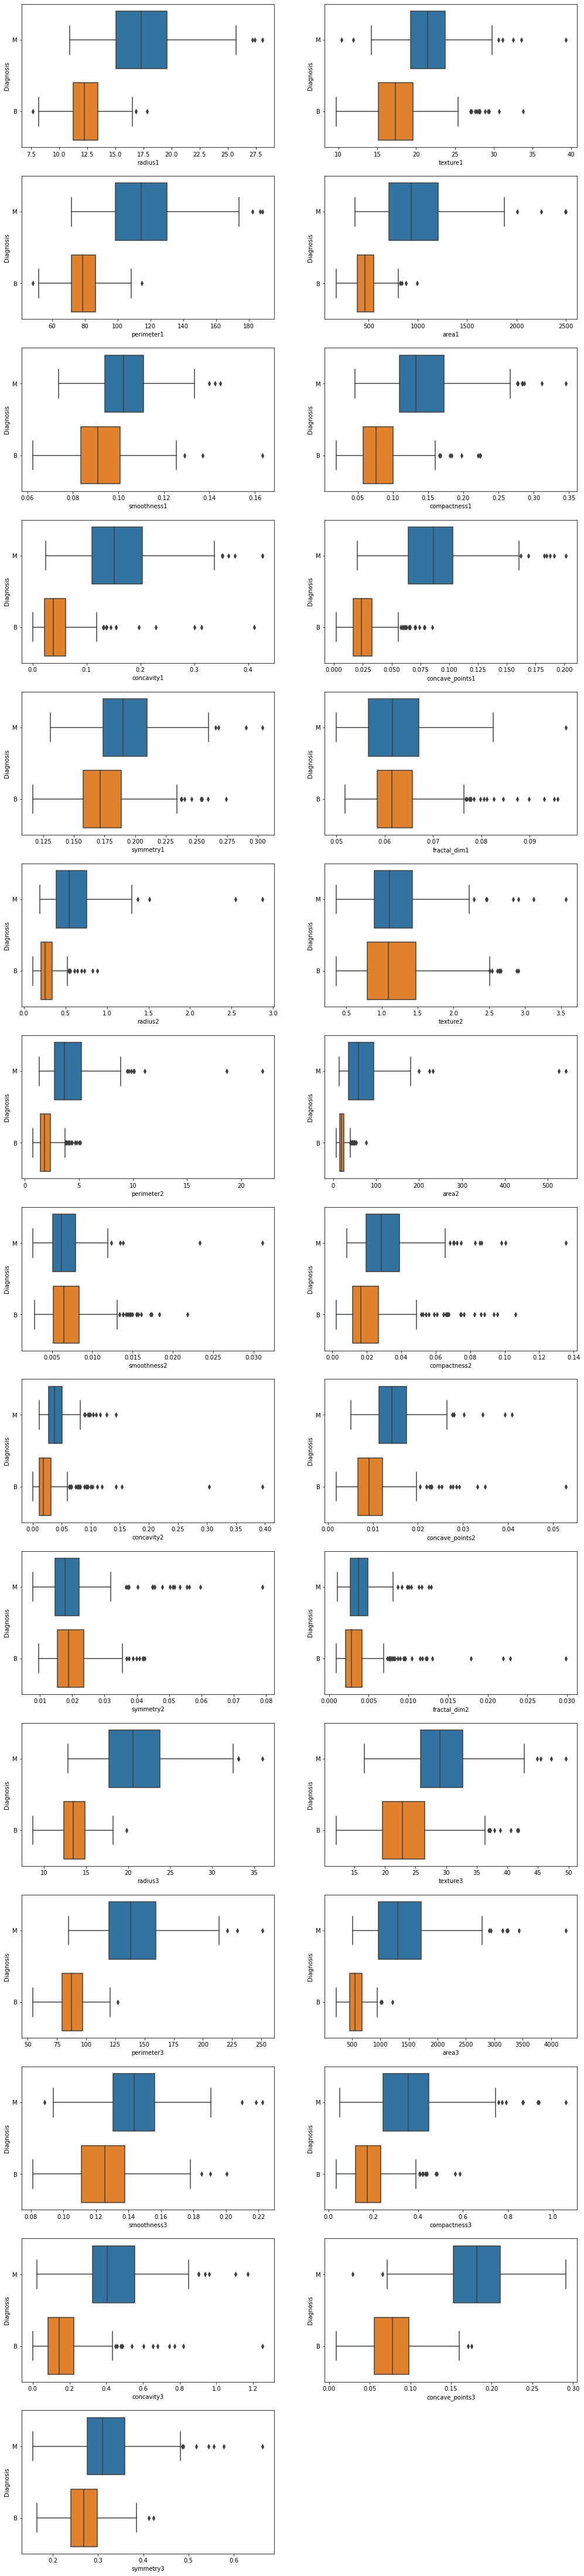

In [378]:
plt.figure(figsize=(17, 80))
for feature, i in zip(features, range(1, len(features))):
    plt.subplot(15, 2, i)
    sns.boxplot(x=df[feature], y=df['Diagnosis'])
#     df.plot.box(column=feature, figsize=(10, 8))

In [336]:
corr = df.corr()
for feature in features:
    print(corr[feature][corr[feature] > 0.75])

radius1            1.000000
perimeter1         0.997764
area1              0.988084
concave_points1    0.817005
radius3            0.968670
perimeter3         0.964066
area3              0.941570
Name: radius1, dtype: float64
texture1    1.000000
texture3    0.910433
Name: texture1, dtype: float64
radius1            0.997764
perimeter1         1.000000
area1              0.987188
concave_points1    0.846430
radius3            0.968566
perimeter3         0.969483
area3              0.942012
concave_points3    0.760817
Name: perimeter1, dtype: float64
radius1            0.988084
perimeter1         0.987188
area1              1.000000
concave_points1    0.818449
area2              0.802171
radius3            0.961839
perimeter3         0.958139
area3              0.958411
Name: area1, dtype: float64
smoothness1    1.000000
smoothness3    0.800004
Name: smoothness1, dtype: float64
compactness1       1.000000
concavity1         0.880493
concave_points1    0.826595
compactness3       0.86184

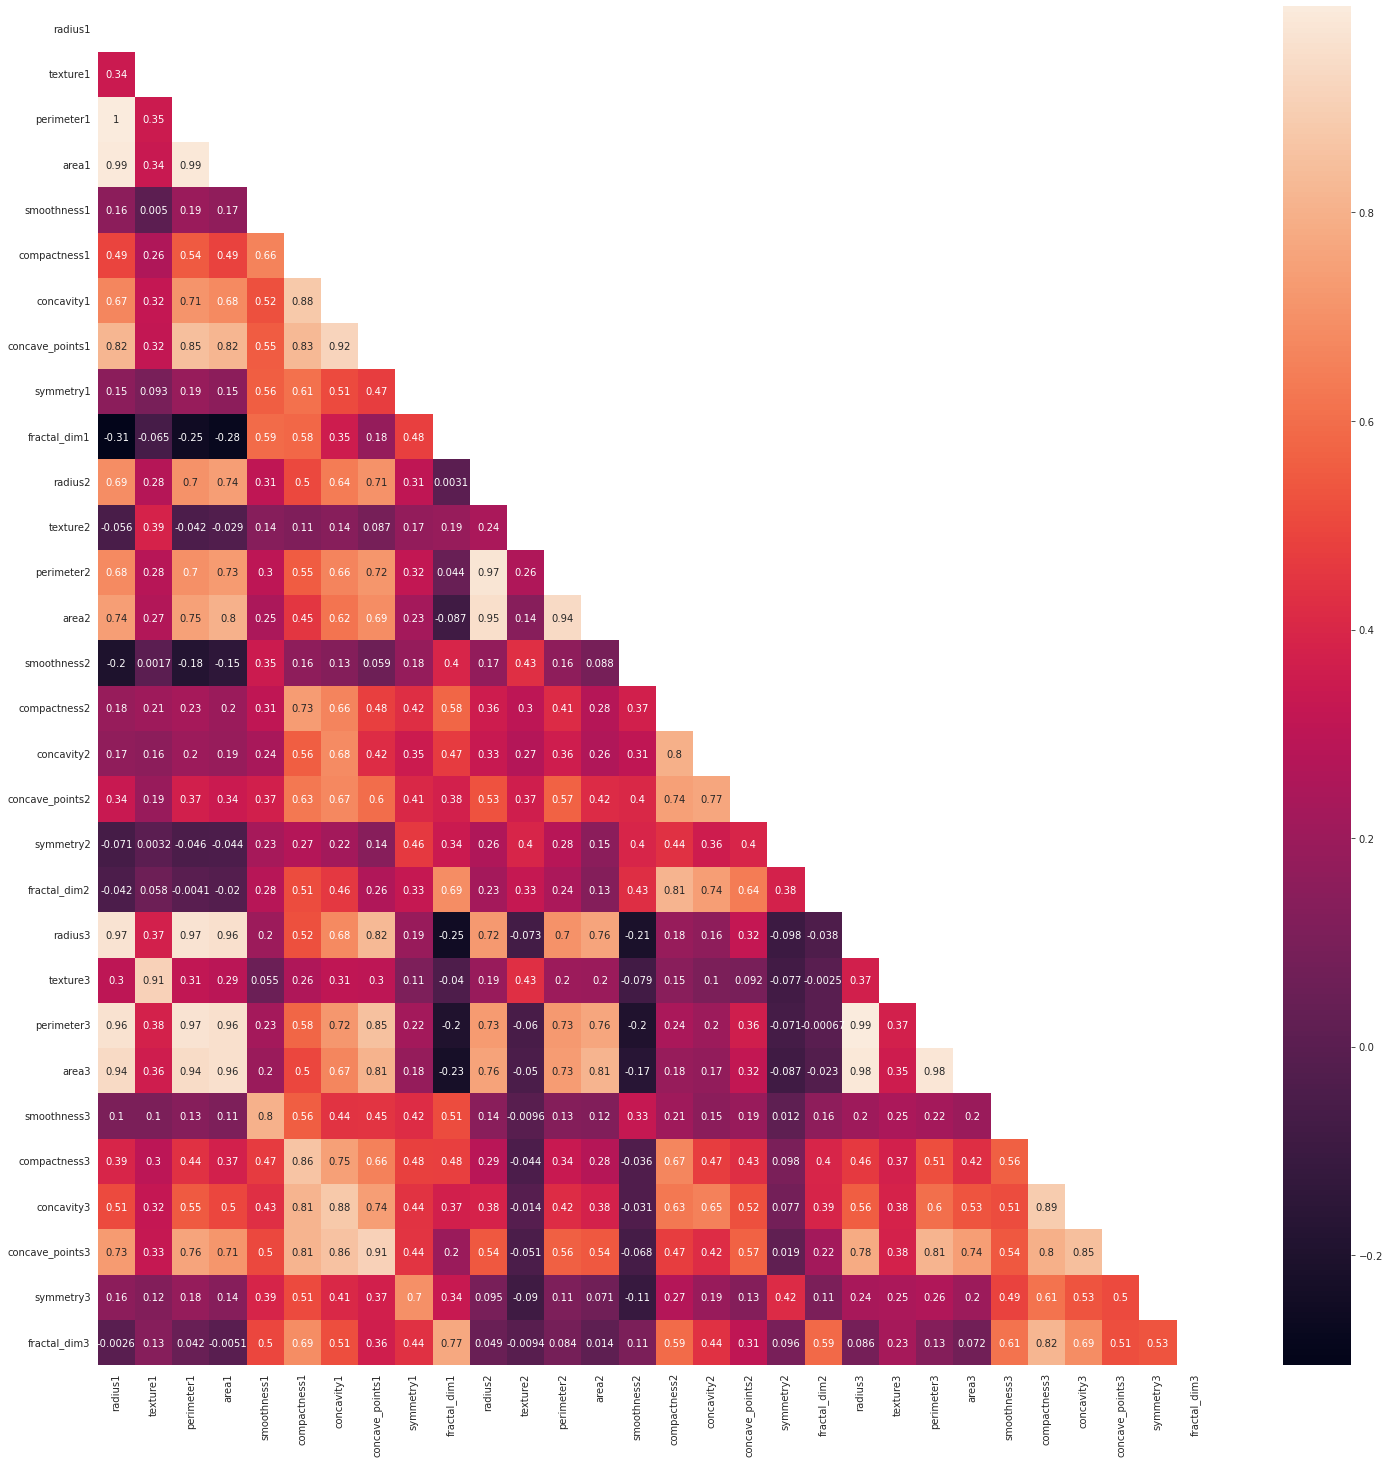

In [380]:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    plt.figure(figsize=(25, 25))
    sns.heatmap(corr, annot=True, mask=mask)
# plt.savefig("corr_matrix")

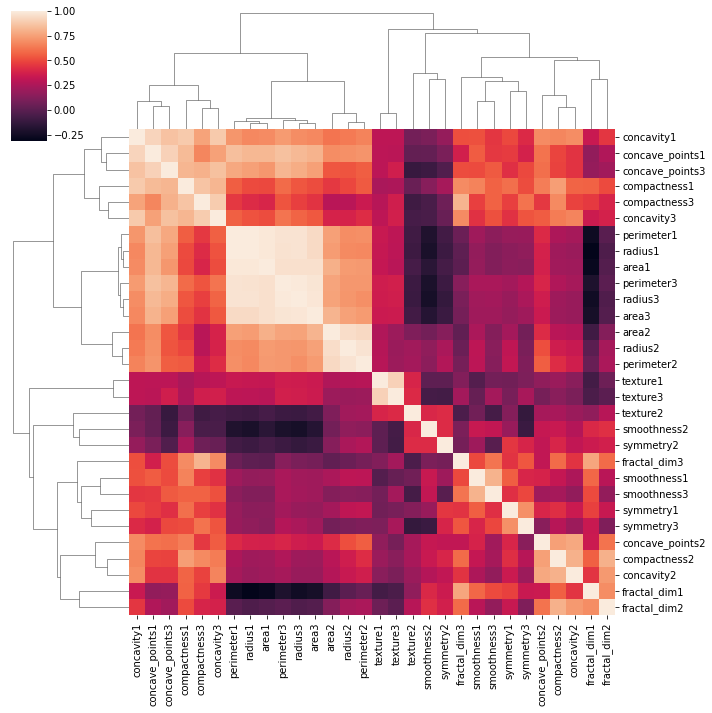

In [284]:
sns.clustermap(corr)

# Statistic tests

In [285]:
# Delete rows with missing values
df = df.drop(labels=idx_with_missing_values, axis=0)
df.shape

(556, 31)

In [287]:
# Separation in two sets M and B
malignant_df = df[df["Diagnosis"] == 'M']
benign_df = df[df["Diagnosis"] == 'B']

# For student test, we need as much as M as B
balanced_benign = benign_df.sample(malignant_df.shape[0])
# print(malignant_df.shape, benign_df.shape)

In [288]:
def t_test(col):
    alpha = 0.02
    stat, p = ttest_ind(balanced_benign[col], malignant_df[col])
    if (p < alpha):
        return "H0 rejected"
    else:
        return 0

In [289]:
for feature in features:
    print(f'{feature :-<50} {t_test(feature)}')

radius1------------------------------------------- H0 rejected
texture1------------------------------------------ H0 rejected
perimeter1---------------------------------------- H0 rejected
area1--------------------------------------------- H0 rejected
smoothness1--------------------------------------- H0 rejected
compactness1-------------------------------------- H0 rejected
concavity1---------------------------------------- H0 rejected
concave_points1----------------------------------- H0 rejected
symmetry1----------------------------------------- H0 rejected
fractal_dim1-------------------------------------- 0
radius2------------------------------------------- H0 rejected
texture2------------------------------------------ 0
perimeter2---------------------------------------- H0 rejected
area2--------------------------------------------- H0 rejected
smoothness2--------------------------------------- 0
compactness2-------------------------------------- H0 rejected
concavity2------------

# Feature selection
## Variance treshold

In [61]:
df_var = df.copy()
df_var = df_var.drop('ID', axis=1)

# large_features = ['radius', 'texture', 'perimeter', 'area']

# def robust_scaler(feature):
#     return ((feature - feature.median())/(feature.quantile(q=0.75) - feature.quantile(q=0.25)))

# for i in range(1, 4):
#     for feature in large_features:
#         df_var[f'{feature}{i}'] = robust_scaler(df_var[f'{feature}{i}'])
    
df_var.var(axis=0, numeric_only=True)

radius1                12.418920
texture1               18.498909
perimeter1            590.440480
area1              123843.554318
smoothness1             0.000198
compactness1            0.002789
concavity1              0.006355
concave_points1         0.001506
symmetry1               0.000752
fractal_dim1            0.000050
radius2                 0.076902
texture2                0.304316
perimeter2              4.087896
area2                2069.431583
smoothness2             0.000009
compactness2            0.000321
concavity2              0.000911
concave_points2         0.000038
symmetry2               0.000068
fractal_dim2            0.000007
radius3                23.360224
texture3               37.776483
perimeter3           1129.130847
area3              324167.385102
smoothness3             0.000521
compactness3            0.024755
concavity3              0.043524
concave_points3         0.004321
symmetry3               0.003828
fractal_dim3            0.000326
dtype: flo

## Kbest

In [103]:
from sklearn.feature_selection import SelectPercentile, chi2

X = df.drop(['ID', 'Diagnosis'], axis=1)
y = df['Diagnosis']

selector = SelectPercentile(score_func=chi2, percentile=35)
selector.fit_transform(X, y)
selected = selector.get_support()
selected

array([ True,  True,  True,  True, False, False, False, False, False,
       False, False, False,  True,  True, False, False, False, False,
       False, False,  True,  True,  True,  True, False, False,  True,
       False, False, False])

In [104]:
col = df.columns
col = col.drop(['ID', 'Diagnosis'])
col[selected]

Index(['radius1', 'texture1', 'perimeter1', 'area1', 'perimeter2', 'area2',
       'radius3', 'texture3', 'perimeter3', 'area3', 'concavity3'],
      dtype='object')